In [452]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [333]:
df = pd.read_csv('assets/cleaned_spotify_data.csv')

In [334]:
df.shape

(27422, 9)

### Feature Engineering

In [335]:
# Creating a new feature called 'active_years' using 'last_release_year' - 'first_release_year'
#df['active_years'] = df['last_release_year'] - df['first_release_year']
#df.head()

In [336]:
# creating new log_followers feature
df['log_followers'] = round(np.log1p(df['followers']), 2)
df.head()

,dates,names,monthly_listeners,popularity,followers,genres,first_release_year,last_release_year,playlists_found,log_followers
0,2024-04-01,stayc,3049521.0,63,1782552,"k-pop, k-pop girl group",2020,2024,K-Pop ON! (온),14.39
1,2024-04-01,langhorne slim,1060777.0,51,163686,"anti-folk, indie folk, modern folk rock, new a...",2008,2023,Sunrise Run,12.01
2,2024-04-01,hontoni,119199.0,35,60,NaN,2021,2024,Meditate to the Sounds of Nature,4.11
3,2024-04-01,d'verti,46999.0,29,42,NaN,2022,2024,Meditate to the Sounds of Nature,3.76
4,2024-04-01,luke bryan,10460890.0,76,8487512,"contemporary country, country, country road, m...",2007,2023,Sunrise Run,15.95


### Data Splitting

In [383]:
# applying log to the follower to enure consistency with logged follower
y = df['monthly_listeners']
X = df.drop(['monthly_listeners', 'dates', 'names', 'genres', 'playlists_found'], axis = 1)

In [384]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

### Linear Regression

In [385]:
lr = LinearRegression().fit(X_train, y_train)

In [386]:
# recall step. Testing model on trained data
y_lr_train_pred = lr.predict(X_train)

# testing step. Testing model on unseen data
y_lr_test_pred = lr.predict(X_test)

In [387]:
# log y_train
y_train

18694       13010.0
16449      129980.0
3594       174096.0
22792     2255559.0
5365     16986046.0
            ...    
12119       68007.0
24423    15828796.0
14147    19764628.0
23320      146891.0
5640     59588927.0
Name: monthly_listeners, Length: 21937, dtype: float64

### Evaluate Model Performance

In [388]:
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [389]:
print("Linear Regression MSE (Train):", lr_train_mse)
print("Linear Regression R2 (Train):", lr_train_r2)
print("Linear Regression MSE (Test):", lr_test_mse)
print("Linear Regression R2 (Test):", lr_test_r2)

Linear Regression MSE (Train): 39030402025252.09
Linear Regression R2 (Train): 0.743602623543351
Linear Regression MSE (Test): 38411205574113.51
Linear Regression R2 (Test): 0.7302947739180652


Text(0.5, 0, 'Actual Monthly Listens')

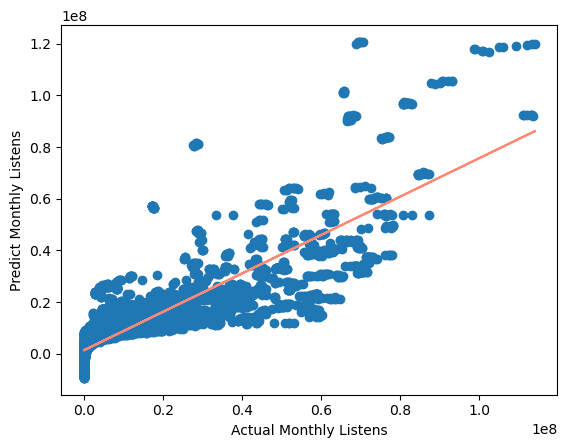

In [397]:
plt.scatter(x = y_train, y = y_lr_train_pred)
# line of best fit
z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F87')
plt.ylabel('Predict Monthly Listens')
plt.xlabel('Actual Monthly Listens')

In [398]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,39030402025252.09375,0.743603,38411205574113.507812,0.730295


### Testing Ridge/Lasso Model

In [399]:
from sklearn.linear_model import Ridge
rg = Ridge().fit(X_train, y_train) 

In [400]:
# Recall
y_rg_train_pred = rg.predict(X_train)

# testing
y_rg_test_pred = rg.predict(X_test)


In [401]:
y_train

18694       13010.0
16449      129980.0
3594       174096.0
22792     2255559.0
5365     16986046.0
            ...    
12119       68007.0
24423    15828796.0
14147    19764628.0
23320      146891.0
5640     59588927.0
Name: monthly_listeners, Length: 21937, dtype: float64

In [402]:
y_rg_train_pred

array([-1532183.68777462,   138052.29635087,   919852.29385677, ...,
       16195274.6949106 ,   490164.71309726, 14560773.08934541])

In [403]:
rg_train_mse = mean_squared_error(y_train, y_rg_train_pred)
rg_train_r2 = r2_score(y_train, y_rg_train_pred)

rg_test_mse = mean_squared_error(y_test, y_rg_test_pred)
rg_test_r2 = r2_score(y_test, y_rg_test_pred)

In [404]:
print("Ridge Regression MSE (Train):", rg_train_mse)
print("Ridge Regression R2 (Train):", rg_train_r2)
print("Ridge Regression MSE (Test):", rg_test_mse)
print("Ridge Regression R2 (Test):", rg_test_r2)

Ridge Regression MSE (Train): 39030402025258.01
Ridge Regression R2 (Train): 0.7436026235433122
Ridge Regression MSE (Test): 38411205724529.555
Ridge Regression R2 (Test): 0.7302947728619151


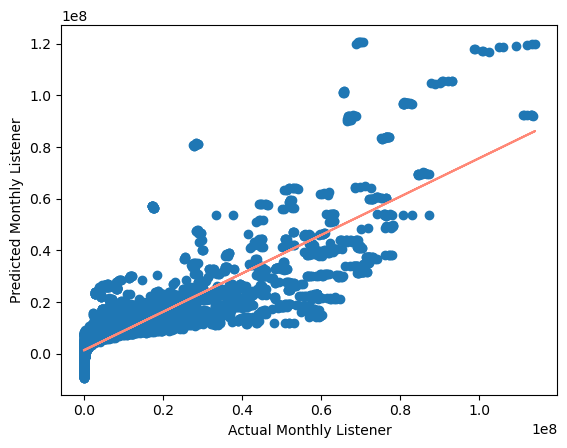

In [405]:
plt.scatter(y_train, y_rg_train_pred)

z = np.polyfit(y_train, y_rg_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), "#F87")
plt.ylabel('Predicted Monthly Listener')
plt.xlabel('Actual Monthly Listener')
plt.show()

In [406]:
rg_results = pd.DataFrame(['Ridge Regression', rg_train_mse, rg_train_r2, rg_test_mse, rg_test_r2]).transpose()
rg_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rg_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Ridge Regression,39030402025258.007812,0.743603,38411205724529.554688,0.730295


In [407]:
model_comp = pd.concat([lr_results, rg_results], axis = 0).reset_index(drop=True)
model_comp

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,39030402025252.09375,0.743603,38411205574113.507812,0.730295
1,Ridge Regression,39030402025258.007812,0.743603,38411205724529.554688,0.730295


### Testing Decision Tree Regressoin

In [408]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(X_train, y_train) 

In [409]:
# recall
y_tree_train_pred = tree.predict(X_train)

# testing
y_tree_test_pred = tree.predict(X_test)

In [410]:
y_test

26903    64317144.0
8510       138135.0
13111       22843.0
1652     59506442.0
10884      668526.0
            ...    
20491       22280.0
7529       170046.0
1513       656789.0
19219      315506.0
23812      279043.0
Name: monthly_listeners, Length: 5485, dtype: float64

In [411]:
y_tree_test_pred

array([6.4254153e+07, 1.3654600e+05, 4.5855000e+04, ..., 6.5027400e+05,
       2.9272900e+05, 4.0862900e+05])

In [412]:
# Evaluation
tree_train_mse = mean_squared_error(y_train, y_tree_train_pred)
tree_train_r2 = r2_score(y_train, y_tree_train_pred)

tree_test_mse = mean_squared_error(y_test, y_tree_test_pred)
tree_test_r2 = r2_score(y_test, y_tree_test_pred)

In [413]:
print("Decision Tree Regression MSE (Train):", tree_train_mse)
print("Decision Tree Regression R2 (Train):", tree_train_r2)
print("Decision Tree Regression MSE (Test):", tree_test_mse)
print("Decision Tree Regression R2 (Test):", tree_test_r2)

Decision Tree Regression MSE (Train): 89146306.47020416
Decision Tree Regression R2 (Train): 0.9999994143826886
Decision Tree Regression MSE (Test): 3832654238783.9956
Decision Tree Regression R2 (Test): 0.9730889238565905


Text(0.5, 0, 'Actual Monthly Listeners')

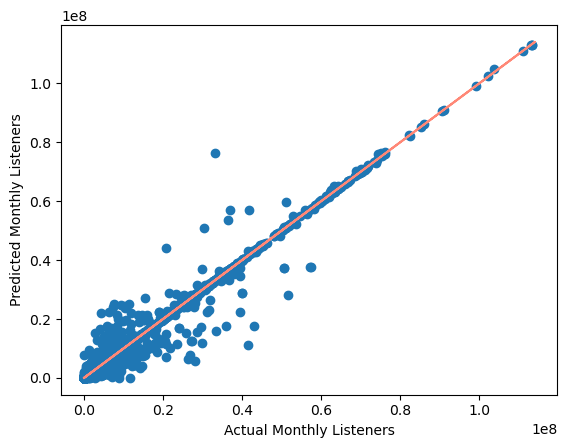

In [414]:
plt.scatter(x = y_test, y = y_tree_test_pred)

z = np.polyfit(y_train, y_tree_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), "#F87")
plt.ylabel('Predicted Monthly Listeners')
plt.xlabel('Actual Monthly Listeners')

In [415]:
tree_results = pd.DataFrame(['Decision Tree Regression', tree_train_mse, tree_train_r2, tree_test_mse, tree_test_r2]).transpose()
tree_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
tree_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Decision Tree Regression,89146306.470204,0.999999,3832654238783.995605,0.973089


In [416]:
model_comp = pd.concat([model_comp, tree_results], axis = 0).reset_index(drop = True)
model_comp

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,39030402025252.09375,0.743603,38411205574113.507812,0.730295
1,Ridge Regression,39030402025258.007812,0.743603,38411205724529.554688,0.730295
2,Decision Tree Regression,89146306.470204,0.999999,3832654238783.995605,0.973089


### Random Forrest Regression

In [417]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor().fit(X_train, y_train)

In [418]:
# recall
y_rfr_train_pred = rfr.predict(X_train)

# testing
y_rfr_test_pred = rfr.predict(X_test)

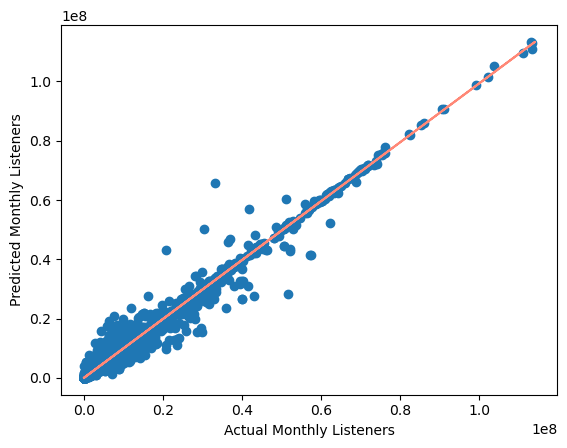

In [419]:
plt.scatter(x = y_test, y = y_rfr_test_pred)

z = np.polyfit(y_train, y_rfr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), "#F87")
plt.ylabel('Predicted Monthly Listeners')
plt.xlabel('Actual Monthly Listeners')
plt.show()

In [420]:
rfr_train_mse = mean_squared_error(y_train, y_rfr_train_pred)
rfr_train_r2 = r2_score(y_train, y_rfr_train_pred)

rfr_test_mse = mean_squared_error(y_test, y_rfr_test_pred)
rfr_test_r2 = r2_score(y_test, y_rfr_test_pred)

In [421]:
rfr_results = pd.DataFrame(['Random Forrest Regression', rfr_train_mse, rfr_train_r2, rfr_test_mse, rfr_test_r2]).transpose()
rfr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rfr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forrest Regression,343525226525.27417,0.997743,2494303186254.877441,0.982486


In [422]:
model_comp = pd.concat([model_comp, rfr_results], axis = 0).reset_index(drop = True)
model_comp

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,39030402025252.09375,0.743603,38411205574113.507812,0.730295
1,Ridge Regression,39030402025258.007812,0.743603,38411205724529.554688,0.730295
2,Decision Tree Regression,89146306.470204,0.999999,3832654238783.995605,0.973089
3,Random Forrest Regression,343525226525.27417,0.997743,2494303186254.877441,0.982486


### XGBoost Implementation

In [423]:
#%pip install xgboost

In [424]:
from xgboost import XGBRegressor
xgbr = XGBRegressor(objective = 'reg:squarederror', 
                    tree_method = 'hist',
                    n_estimators = 8000, 
                    learning_rate = 0.015, 
                    mx_depth = 4).fit(X_train, y_train)

In [425]:
# recall
y_xgbr_train_pred = xgbr.predict(X_train)

# testing
y_xgbr_test_pred = xgbr.predict(X_test)

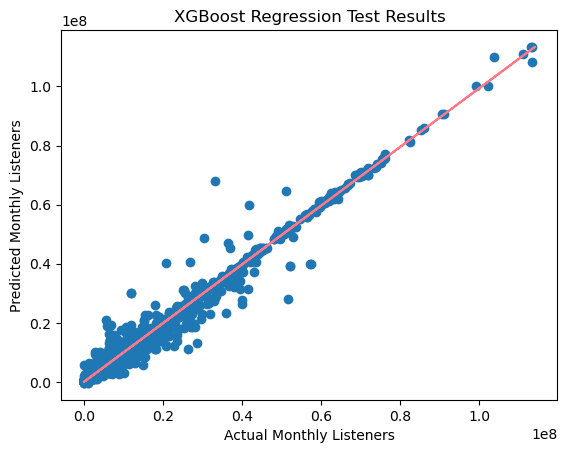

In [426]:
plt.scatter(x = y_test, y = y_xgbr_test_pred)

z = np.polyfit(y_train, y_xgbr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), color = "#F78")

plt.title('XGBoost Regression Test Results')
plt.xlabel('Actual Monthly Listeners')
plt.ylabel('Predicted Monthly Listeners')
plt.show()

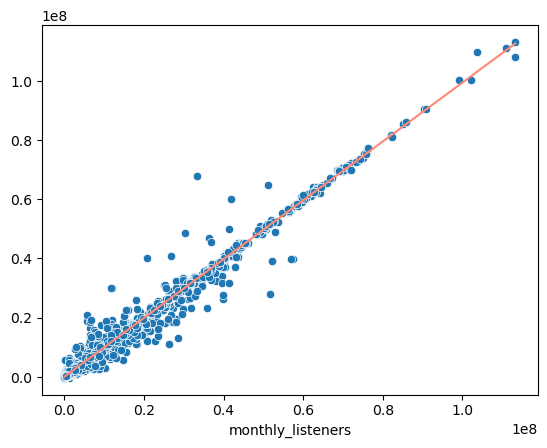

In [458]:
z = np.polyfit(y_train, y_xgbr_train_pred, 1)
p = np.poly1d(z)

sns.lineplot(x = y_test, y = p(y_test), color = "#F87")
sns.scatterplot(x = y_test,
                y = y_xgbr_test_pred,
                markers=True)
plt.show()

In [427]:
xgbr_train_mse = mean_squared_error(y_train, y_xgbr_train_pred)
xgbr_train_r2 = r2_score(y_train, y_xgbr_train_pred)

xgbr_test_mse = mean_squared_error(y_test, y_xgbr_test_pred)
xgbr_test_r2 = r2_score(y_test, y_xgbr_test_pred)

In [428]:
xgbr_results = pd.DataFrame(['XGBoost Regression', xgbr_train_mse, xgbr_train_r2, xgbr_test_mse, xgbr_test_r2]).transpose()
xgbr_results.columns = ['Method', 'Training MSE',	'Training R2', 'Test MSE', 'Test R2']
xgbr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,XGBoost Regression,566224055422.700195,0.99628,2549885785970.439453,0.982096


In [429]:
model_comp = pd.concat([model_comp, xgbr_results], axis = 0).reset_index(drop = True)
model_comp

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,39030402025252.09375,0.743603,38411205574113.507812,0.730295
1,Ridge Regression,39030402025258.007812,0.743603,38411205724529.554688,0.730295
2,Decision Tree Regression,89146306.470204,0.999999,3832654238783.995605,0.973089
3,Random Forrest Regression,343525226525.27417,0.997743,2494303186254.877441,0.982486
4,XGBoost Regression,566224055422.700195,0.99628,2549885785970.439453,0.982096


### Unseen Data Testing

In [430]:
artist_stats = []
artist_name = 'taraj'
popularity = 10
followers = 1308
first_release_year = 2023
last_release_year = 2025
active_years = last_release_year - first_release_year
log_followers = np.log1p(followers)

In [431]:
artist_stats = pd.DataFrame([popularity, followers, first_release_year, last_release_year, log_followers]).transpose()
artist_stats.columns = ['popularity', 'followers', 'first_release_year', 'last_release_year', 'log_followers']
artist_stats.head()

,popularity,followers,first_release_year,last_release_year,log_followers
0,10.0,1308.0,2023.0,2025.0,7.177019


In [449]:
artist_monthly_listens = rfr.predict(artist_stats)

In [450]:
artist_monthly_listens = int(artist_monthly_listens[0])

In [451]:
print(f"{artist_name}'s predicted monthly listeners is around {artist_monthly_listens}!")

taraj's predicted monthly listeners is around 4031!
